In [34]:
# Import libraries
import sys
import os

In [35]:
MYPREFIX='/u/gazal/APT_calculations/CompositionSpace_git/CompositionSpaceNFDI'
CWD = os.getcwd()
sys.path.append(MYPREFIX)
! echo $PWD

/talos/u/gazal/APT_calculations/CompositionSpace_git/CompositionSpaceNFDI/tests


In [36]:
from compositionspace.datautils import Prepare_data
import json 
import pandas as pd
import matplotlib.pylab as plt
from compositionspace.segmentation import Composition_clustering
from compositionspace.postprocessing import Postprocess_data

In [37]:
import os
print (os.getcwd())

/talos/u/gazal/APT_calculations/CompositionSpace_git/CompositionSpaceNFDI/tests


In [38]:
experiment_param = json.load(open("experiment_params.json","r"))

In [39]:
try:
    experiment_param = json.load(open("experiment_params.json","r"))
except:
    ValueError("Could not read parameter file")

In [40]:
experiment_param

{'input_path': '/u/gazal/APT_calculations/for_nikita_Sm_Zr_Cu_Fe/APT_exp_Data_D3/D1',
 'output_path': '/u/gazal/APT_calculations/CompositionSpace_git/output',
 'n_big_slices': 10,
 'voxel_size': 2,
 'bics_clusters': 10,
 'n_phases': 3,
 'submission_path': 'spaceship-titanic/submission.csv',
 'target': 'Transported',
 'fill_numerical_with': {},
 'fill_categorical_with': {},
 'parameters': {'drop_features': ['PassengerId', 'Name', 'Cabin'],
  'normalization': {'method': 'mean'},
  'preprocess_method': 1,
  'fill_numerical_columns': 'mean',
  'fill_categorical_columns': 'mode',
  'ml_models': {'GaussianMixture': {'name': 'GaussianMixture',
    'params': {'n_components': 3, 'max_iter': 100000, 'verbose': 0}}}}}

In [41]:
Input_Data = Prepare_data(params=experiment_param)

In [42]:
Input_Data.get_big_slices()

  0%|          | 0/3 [00:00<?, ?it/s]

D1 High Hc R5076_52126.apt
Done, reading *.APT file


100%|██████████| 3/3 [00:02<00:00,  1.07it/s]


/u/gazal/APT_calculations/for_nikita_Sm_Zr_Cu_Fe/APT_exp_Data_D3/D1/R5076_53078__SmCoFeCuZr_goodrangefile_20210309_Polin_WithoutHydrites_colors.RRNG
hi


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


In [43]:
Input_Data.get_voxels()

  0%|          | 0/10 [00:00<?, ?it/s]

chunk_0
-266
-264
-262
-260
-258
-256
-254
-252
-250
-248
-246
-244
-242



 10%|█         | 1/10 [00:55<08:21, 55.71s/it]

chunk_1
-240
-238
-236
-234
-232
-230
-228
-226
-224
-222
-220
-218
-216
-214



 20%|██        | 2/10 [02:08<08:47, 65.88s/it]

chunk_2
-213
-211
-209
-207
-205
-203
-201
-199
-197
-195
-193
-191
-189
-187



 30%|███       | 3/10 [03:21<08:02, 68.91s/it]

chunk_3
-186
-184
-182
-180
-178
100000
-176
-174
-172
-170
-168
-166
-164
-162



 40%|████      | 4/10 [04:21<06:34, 65.67s/it]

chunk_4
-160
-158
-156
-154
-152
-150
-148
-146
-144
-142
-140
-138
-136
-134



 50%|█████     | 5/10 [05:20<05:16, 63.24s/it]

chunk_5
-133
-131
-129
-127
-125
-123
-121
-119
-117
-115
-113
-111
-109



 60%|██████    | 6/10 [06:08<03:52, 58.10s/it]

chunk_6
-107
-105
-103
-101
-99
-97
-95
-93
-91
-89
-87
-85
-83
-81



 70%|███████   | 7/10 [06:58<02:46, 55.34s/it]

chunk_7
-80
-78
200000
-76
-74
-72
-70
-68
-66
-64
-62
-60
-58
-56
-54



 80%|████████  | 8/10 [07:41<01:42, 51.45s/it]

chunk_8
-53
-51
-49
-47
-45
-43
-41
-39
-37
-35
-33
-31
-29



 90%|█████████ | 9/10 [08:10<00:44, 44.27s/it]

chunk_9
-27
-25
-23
-21
-19
-17
-15
-13
-11
-9
-7
-5
-3
-1



100%|██████████| 14/14 [08:24<00:00, 36.07s/it]


In [44]:
Input_Data.get_voxel_composition()

100%|██████████| 238395/238395 [02:45<00:00, 1437.81it/s]


In [45]:
Input_Data = Composition_Space(params=experiment_param)

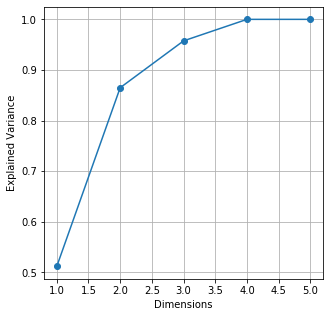

array([0.5116405 , 0.86487543, 0.95748953, 1.        , 1.        ])

In [46]:
Input_Data.get_PCA_cumsum()

100%|██████████| 9/9 [00:56<00:00,  6.23s/it]


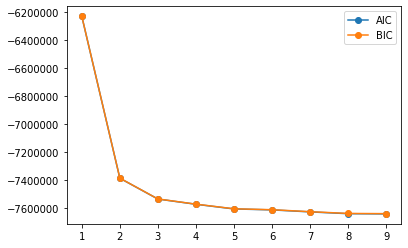

(10,
 [-6231311.162407463,
  -7389077.166082203,
  -7537853.830017556,
  -7575362.680720815,
  -7608665.641566438,
  -7615491.681629455,
  -7629850.15341818,
  -7642624.381575269,
  -7644231.862640226],
 [-6231103.528722648,
  -7388651.517028331,
  -7537210.165594627,
  -7574501.000928829,
  -7607585.946405395,
  -7614193.971099355,
  -7628334.4275190225,
  -7640890.640307055,
  -7642280.106002956])

In [47]:
Input_Data.get_bics_minimization()

In [48]:
ml_params = experiment_param["parameters"]["ml_models"]["GaussianMixture"]
Input_Data.get_composition_clusters(ml_params=ml_params)




[23160, 42157, 173078]


100%|██████████| 238395/238395 [02:15<00:00, 1764.18it/s]


In [49]:
Input_Data = Composition_Space(params=experiment_param)
Input_Data.plot3d()

/u/gazal/APT_calculations/CompositionSpace_git/output/Output_voxel_cetroids_phases_0
/u/gazal/APT_calculations/CompositionSpace_git/output/Output_voxel_cetroids_phases_1


In [50]:
Input_Data = Postprocess_data(params=experiment_param)

100%|██████████| 13/13 [00:00<00:00, 712.75it/s]


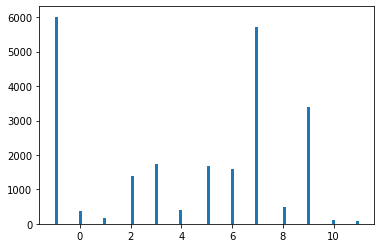

In [51]:
Input_Data.DBSCAN_clustering(cluster_id = 0,eps = 5., min_samples= 40,plot=True,plot3d=True,save=True)